### Support Vector Regression



### Importing libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### Reading dataset

In [46]:

dataset = pd.read_csv('../input/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

y = y.reshape(len(y),1)

### Feature Scaling

In [47]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### Train the SVR model

The Gaussian RBF Kernel

$K(\overrightarrow{x}, \overrightarrow{l}^i) = e^{-\frac{\|\overrightarrow{x}-\overrightarrow{l}^{i}\|^{2}}{2\sigma^{2}}}$

In [55]:
svr = SVR(kernel = 'rbf')
svr.fit(X, y)

c:\users\muril\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Prediction

In [56]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

### Plotting results

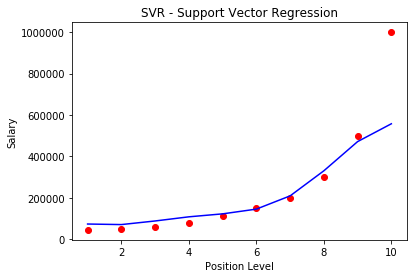

In [59]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X)), color = 'blue')
plt.title('SVR - Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Plotting SVR in higher resolution and smoother curve

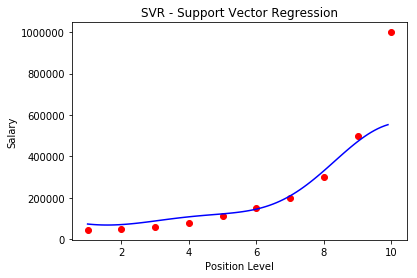

In [62]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1) 
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('SVR - Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()